<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data[900:1000:10]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
900,64,102.10,6688.1,Male,1,No,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,0
910,72,74.40,5360.75,Male,1,Yes,No,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),0
920,8,58.20,469.25,Female,0,No,No,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),0
930,62,115.55,7159.05,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
940,54,24.95,1364.75,Male,1,Yes,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0
950,16,71.40,1212.1,Male,0,No,No,Yes,Yes,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0
960,54,55.00,3092.65,Male,0,No,Yes,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1
970,14,19.35,324.8,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
980,1,48.55,48.55,Male,0,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
990,46,70.60,3231.05,Female,0,Yes,No,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,One year,No,Mailed check,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

**TotalSpent - не числовая серия, необходимо преобразование. Также проверяем NaN-ы.**

In [8]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors = 'coerce')
Nnans = []
for col in feature_cols:
  Nnans.append(sum(data[col].isna()))
pd.Series(Nnans, feature_cols)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

**Обнаружено 9 NaN в TotalSpent - удаляем их**



In [9]:
data = data.dropna()

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

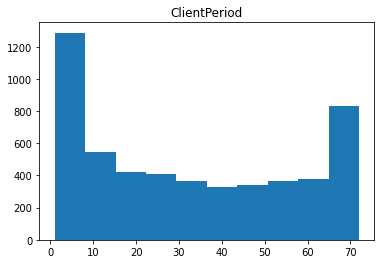

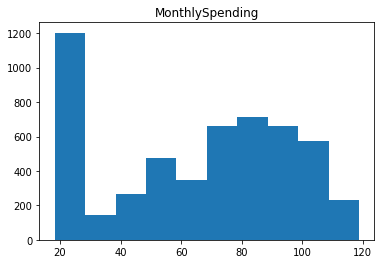

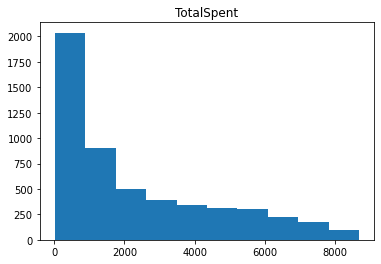

In [10]:
for i in num_cols:
  plt.hist(data[i])
  plt.title(i)
  plt.show()

In [11]:
for i in cat_cols:
  print(data[i].value_counts(), '\n')

Male      2651
Female    2622
Name: Sex, dtype: int64 

0    4431
1     842
Name: IsSeniorCitizen, dtype: int64 

No     2704
Yes    2569
Name: HasPartner, dtype: int64 

No     3676
Yes    1597
Name: HasChild, dtype: int64 

Yes    4754
No      519
Name: HasPhoneService, dtype: int64 

No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64 

Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64 

No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64 

No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64 

No                     2316
Yes                    1820
No internet service    1137
Name: HasDeviceProtection, dtype: int64 

No                     2603
Yes                    1533
No internet service    1137
Name: HasTechSupportAccess,

In [12]:
cat_values = []
for i in cat_cols:
  cat_values.append(data[i].value_counts())

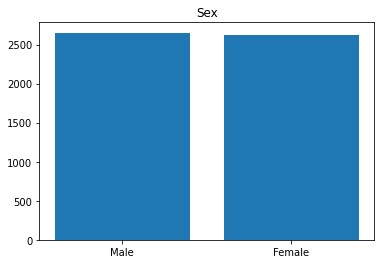

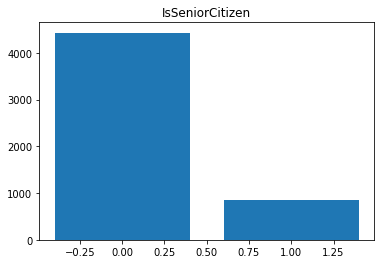

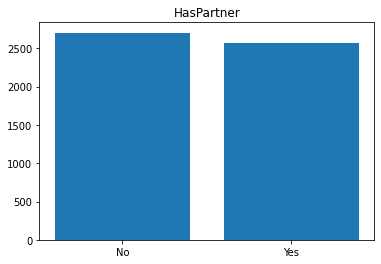

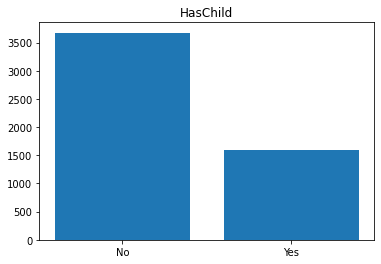

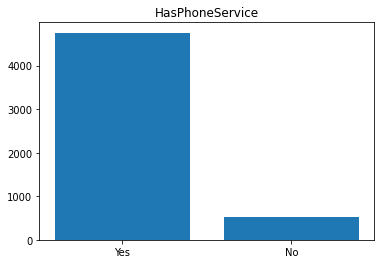

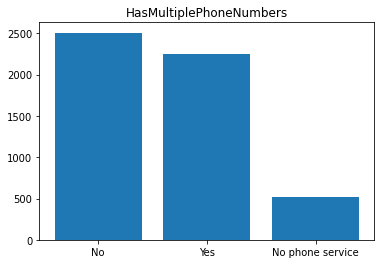

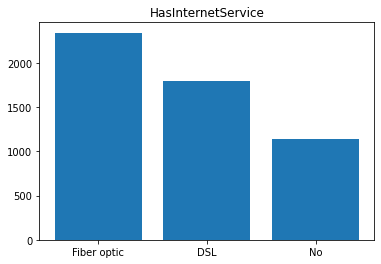

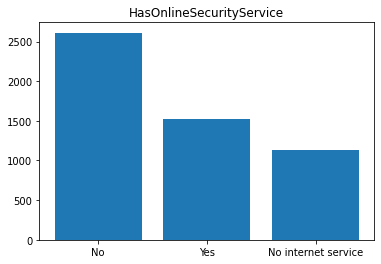

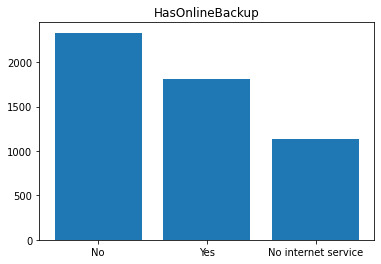

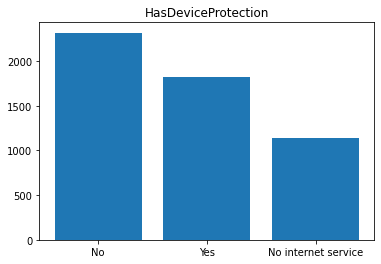

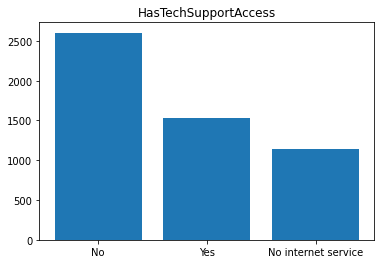

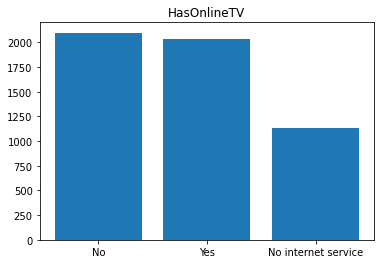

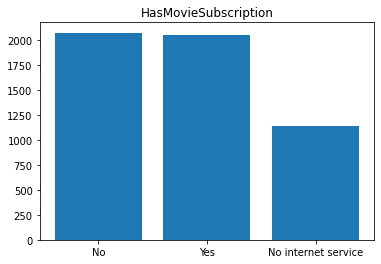

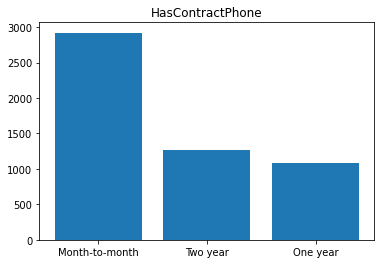

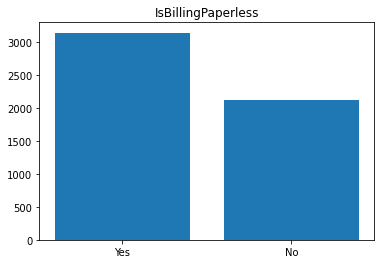

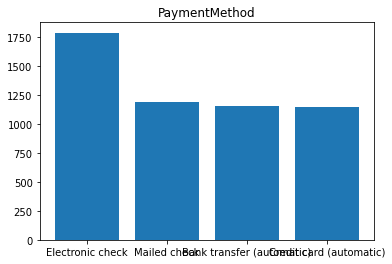

In [13]:
for i, j in zip(cat_values, cat_cols):
  plt.bar(i.index, i)
  plt.title(j)
  plt.show()

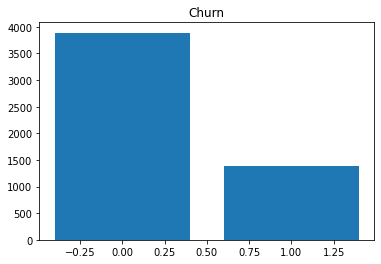

In [14]:
plt.bar(data['Churn'].value_counts().index, data['Churn'].value_counts())
plt.title('Churn')
plt.show()

**Классы не являются не сбалансированными**

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [27]:
num_data = data[num_cols]
cat_data = data[cat_cols]
dummy_features = pd.get_dummies(cat_data)

In [77]:
X = pd.concat([num_data, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [60]:
y = data['Churn']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=58)

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
CV_model = LogisticRegressionCV(Cs = 100, cv=5, scoring='roc_auc', n_jobs=-1, verbose=10)

CV_model.fit(X_train_scaled, y_train)
roc_auc = CV_model.score(X_train_scaled, y_train)
print(roc_auc, CV_model.C_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   14.0s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.4s finished


0.844326528035989 [4.86260158]


In [93]:
roc_auc_test = CV_model.score(X_test_scaled, y_test)
roc_auc_test

0.8655594884230289

**Итого, лучшее значение roc_auc = 0,8656 - у модели с гиперпараметром C = 4,863 (l2 регуляризация)**

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [49]:
import catboost

In [116]:
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=58)

In [117]:
boosting_model = catboost.CatBoostClassifier(cat_features=[3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.019048
0:	learn: 0.6820117	total: 15.6ms	remaining: 15.6s
1:	learn: 0.6706641	total: 33.2ms	remaining: 16.6s
2:	learn: 0.6609054	total: 41.5ms	remaining: 13.8s
3:	learn: 0.6511573	total: 56.8ms	remaining: 14.1s
4:	learn: 0.6421524	total: 70.2ms	remaining: 14s
5:	learn: 0.6324772	total: 85.5ms	remaining: 14.2s
6:	learn: 0.6244966	total: 95.9ms	remaining: 13.6s
7:	learn: 0.6154876	total: 108ms	remaining: 13.4s
8:	learn: 0.6071580	total: 118ms	remaining: 13s
9:	learn: 0.5995905	total: 130ms	remaining: 12.8s
10:	learn: 0.5922071	total: 141ms	remaining: 12.7s
11:	learn: 0.5846660	total: 155ms	remaining: 12.8s
12:	learn: 0.5771607	total: 169ms	remaining: 12.8s
13:	learn: 0.5705095	total: 181ms	remaining: 12.8s
14:	learn: 0.5635496	total: 196ms	remaining: 12.9s
15:	learn: 0.5580255	total: 215ms	remaining: 13.2s
16:	learn: 0.5528994	total: 223ms	remaining: 12.9s
17:	learn: 0.5479914	total: 230ms	remaining: 12.5s
18:	learn: 0.5433095	total: 238ms	remaining: 12.3s
19:	lear

In [118]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
train_auc

0.8957874291353944

In [119]:
test_auc

0.8670628324468086

**С дефолтными параметрами получился test_auc 0,867. Теперь попробуем подобрать learning rate**

In [127]:
new_boosting_model = catboost.CatBoostClassifier(n_estimators=500, silent=True,
                                             cat_features=[3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
                                             eval_metric='AUC')
new_boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 5, 10)}, 
                           X_train_origin, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8424516517
bestIteration = 39

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8424517	best: 0.8424517 (0)	total: 8.1s	remaining: 1m 12s

bestTest = 0.8441673607
bestIteration = 139

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8441674	best: 0.8441674 (1)	total: 15.1s	remaining: 1m

bestTest = 0.8457635483
bestIteration = 283

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8457635	best: 0.8457635 (2)	total: 21.9s	remaining: 51.2s

bestTest = 0.8463765769
bestIteration = 255

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8463766	best: 0.8463766 (3)	total: 28.8s	remaining: 43.3s

bestTes

{'params': {'l2_leaf_reg': 4.444444444444445},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
    

In [128]:

y_test_predicted = new_boosting_model.predict_proba(X_test_origin)[:, 1]

test_auc = roc_auc_score(y_test, y_test_predicted)
test_auc

0.8697835184605758

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**Лучшее качество - 0,8698 при подобранном l2_leaf_reg = 4,44**

# Предсказания

In [129]:
best_model = new_boosting_model

In [150]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.